# This full notebook is previous work

This is from an old project, ideally we should have an ebay notebook that looks like this soon.

In [1]:
from acea_water_prediction_project import Preprocessing, Visualisation, preprocessing_models
Preprocessing.import_test()

Preprocessing successfully imported.


In [2]:
print(Preprocessing.read_data.__doc__) # This is how to read any functions documentation

Reads all csvs from path, names them, and returns a dict with all dataframe objects


When in a function call press "Shift" + "tab" to get the function details. 

For an expanded version hold "Shift" and tap "tab" a few times.

# Reading Data

In [3]:
data_object = Preprocessing.read_data()

# Filtering Columns

In [4]:
Preprocessing.get_filtered_columns(data_object["Lake_Bilancino"], temperature=True, rainfall=True)

{'Lake_Bilancino': ['Temperature_Le_Croci',
  'Rainfall_S_Piero',
  'Rainfall_Mangona',
  'Rainfall_S_Agata',
  'Rainfall_Cavallina',
  'Rainfall_Le_Croci']}

# Revoming implausible zeros

In [5]:
df = data_object["Aquifer_Luco"]
column = "Temperature_Pentolina"
print(Preprocessing.replace_implausible_zeros.__doc__)
new_series = Preprocessing.replace_implausible_zeros(df, col_name = column)
print("Original number of zeros : ", sum(df[column] == 0))
print("After processing number of zeros : ", sum(new_series == 0))

Takes df and a column name. Returns a series where all consecutive zeros are replaced by np.nan, because that's missing data.
Original number of zeros :  283
After processing number of zeros :  2


# Visualisation

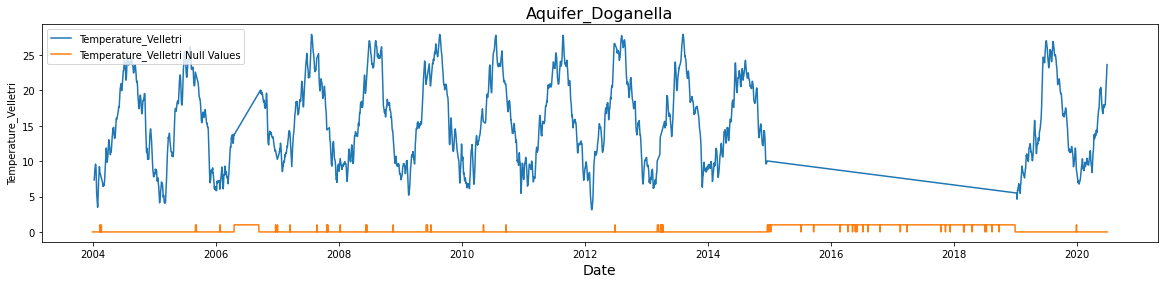

In [6]:
Visualisation.plot_line_graph(df = data_object["Aquifer_Doganella"],
                             columns_to_display = ["Temperature_Velletri"],
                              index_column = "Date",
                             agerage_group_together = 10,
                             show_nulls=True)

# Expanding Datetime Variables

In [7]:
df_name = "Water_Spring_Amiata"
training_columns = Preprocessing.get_filtered_columns(data_object[df_name],date=True)[df_name]
print("Usable date columns : ", training_columns)
expanded_df = Preprocessing.expand_datetime(data_object[df_name], "Date")

training_columns = Preprocessing.get_filtered_columns(expanded_df,date=True)[df_name]
print("Usable date columns after expanding date variable : ", training_columns)

Usable date columns :  []
Usable date columns after expanding date variable :  ['Date_year', 'Date_month', 'Date_week', 'Date_day_of_year']


# Imputing temperature through LightGBM

In [ ]:
all_data = Preprocessing.read_data()

df_name = "Water_Spring_Amiata"
target_columns = ["Temperature_Laghetto_Verde", "Temperature_Abbadia_S_Salvatore"]
input_df = Preprocessing.expand_datetime(all_data[df_name], "Date")
training_columns = Preprocessing.get_filtered_columns(input_df,
                                                      rainfall=True, temperature=True, date=True)[df_name]
print(training_columns)
trained_models, cleaned_df = preprocessing_models.impute_temperature_lgb(input_df, 
                                                                     target_temperature_columns = target_columns,
                                                                        input_columns = training_columns,
                                                                        datetime_column="Date")# csv : Water_Spring_Amiata, col : Temperature_Laghetto_Verde

['Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora', 'Temperature_Laghetto_Verde', 'Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore', 'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata', 'Date_year', 'Date_month', 'Date_week', 'Date_day_of_year']
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
